In [268]:
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import sys

from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

sys.path.append("../src")
from installations.plot import plot_gantt, plot_durations

%matplotlib notebook

installation_data_dir = "../data/windfarms/matching_windfarms//"

In [269]:
installations_metadata = pd.read_csv("../data/windfarms/matching_windfarms/matching_windfarms.csv")
windfarm_database = pd.read_excel("../data/windfarms/windfarms-complete_turbines.ods", engine="odf")
windfarm_database.set_index("index", inplace=True)
windfarm_database.sort_index(inplace=True)

In [270]:
windfarm_database.columns

Index(['name', 'latitude', 'longitude', 'n_turbines', 'turbine_power',
       'windfarm_capacity', 'turbine_installation_start',
       'turbine_installation_end', 'turbine_installation_vessel',
       'days_per_foundation_lit', 'days_per_turbine_lit', 'days_set_lit',
       'Source', 'Unnamed: 14', 'Unnamed: 15'],
      dtype='object')

In [271]:
installations = dict()
for infile in sorted(glob.glob(os.path.join(installation_data_dir, "*cluster-*.csv"))):
    installation_index = int(os.path.basename(infile).split("_")[0])
    vessel_name = installations_metadata.loc[installation_index].vessel_name
    windfarm_database_index = installations_metadata.loc[installation_index].known_windfarms_index
    windfarm = os.path.basename(infile).split("_")[1]
    installations[windfarm_database_index] = pd.read_csv(infile)
    installations[windfarm_database_index].begin = pd.to_datetime(installations[windfarm_database_index].begin)
    installations[windfarm_database_index].end = pd.to_datetime(installations[windfarm_database_index].end)
    installations[windfarm_database_index].insert(loc=0, column='vessel', value=[vessel_name]*len(installations[windfarm_database_index]))
    installations[windfarm_database_index].insert(loc=0, column='windfarm', value=[windfarm]*len(installations[windfarm_database_index]))
    installations[windfarm_database_index].set_index('index', inplace=True)

In [272]:
all_installations = pd.concat([installation for _, installation in installations.items()])
all_installations.sort_values("begin", inplace=True)
all_installations.reset_index(drop=True, inplace=True)
print(f"available turbine installations: {len(all_installations)}")

available turbine installations: 1365


In [273]:
average_installation = all_installations.duration.mean()
median_installation = all_installations.duration.median()
std_installation = all_installations.duration.std()
print(f"average installation time: {average_installation} (median: {median_installation}) +- {std_installation}")

average installation time: 47.33259747659748 (median: 27.049722222222226) +- 58.36211200923583


In [274]:
np.percentile(all_installations.duration, 90)

99.32405555555589

<IPython.core.display.Javascript object>


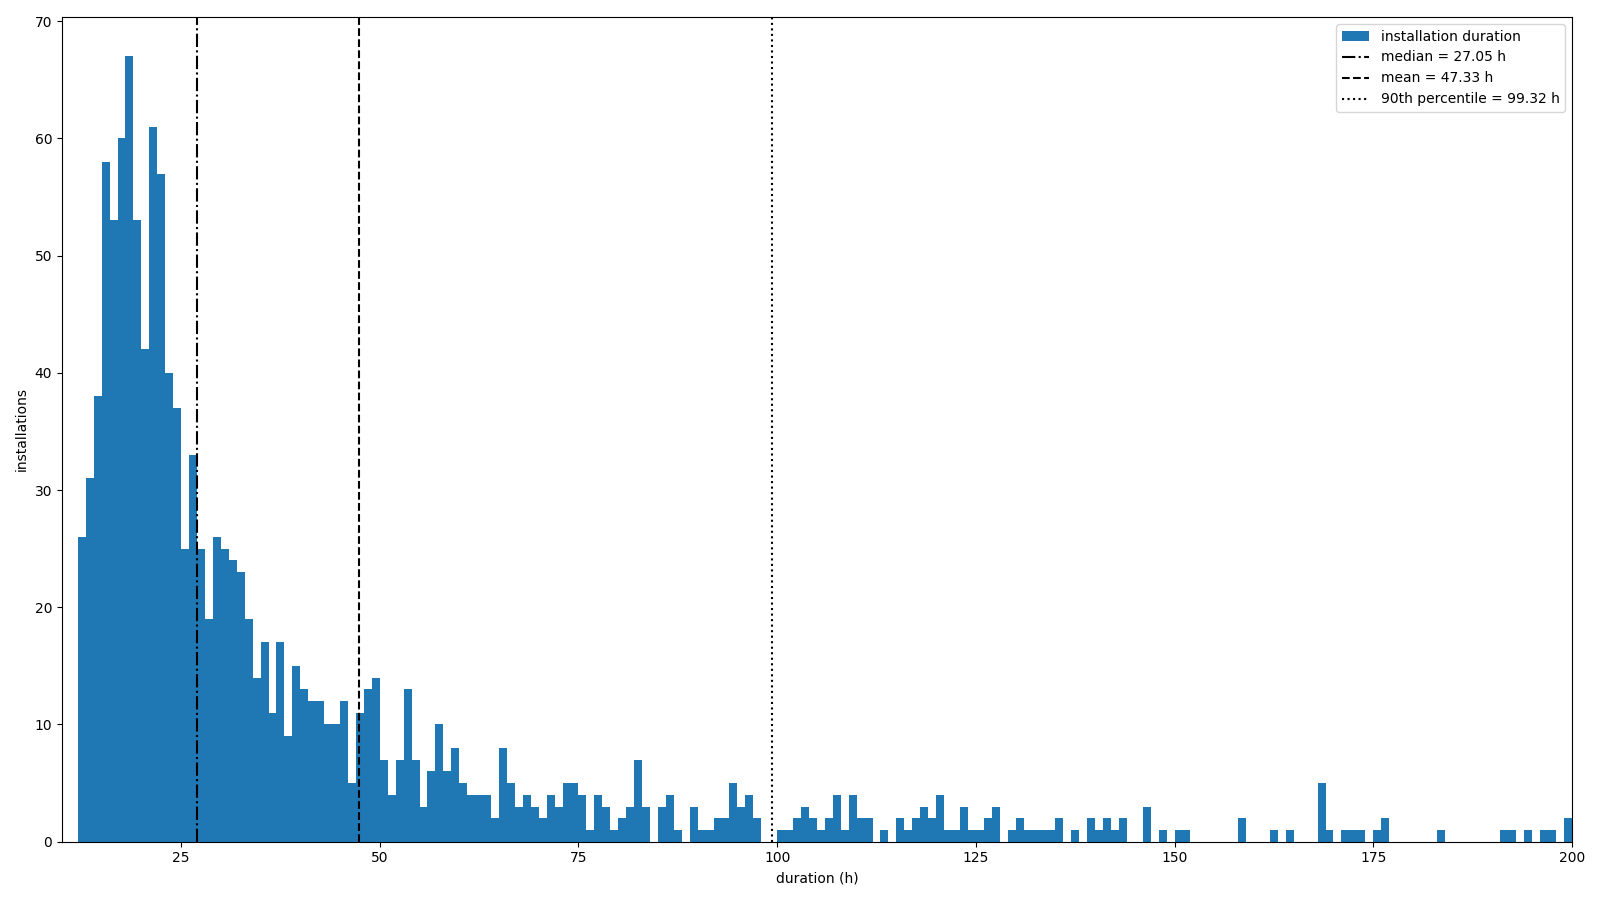

In [275]:
plt.figure(figsize=(16,9))
n, bins, patches = plt.hist(all_installations.duration, bins=[x for x in range(12, 720)], label='installation duration')
plt.xlim([10, 200])
plt.xlabel("duration (h)")
plt.ylabel("installations")
plt.axvline(x = all_installations.duration.median(), label=f'median = {all_installations.duration.median():1.2f} h', color='k', linestyle='-.')
plt.axvline(x = all_installations.duration.mean(), label=f'mean = {all_installations.duration.mean():1.2f} h', color='k', linestyle='--')
plt.axvline(x = np.percentile(all_installations.duration, 90), label=f'90th percentile = {np.percentile(all_installations.duration, 90):1.2f} h', color='k', linestyle='dotted')
plt.axvline()
plt.legend()
plt.tight_layout()


<IPython.core.display.Javascript object>


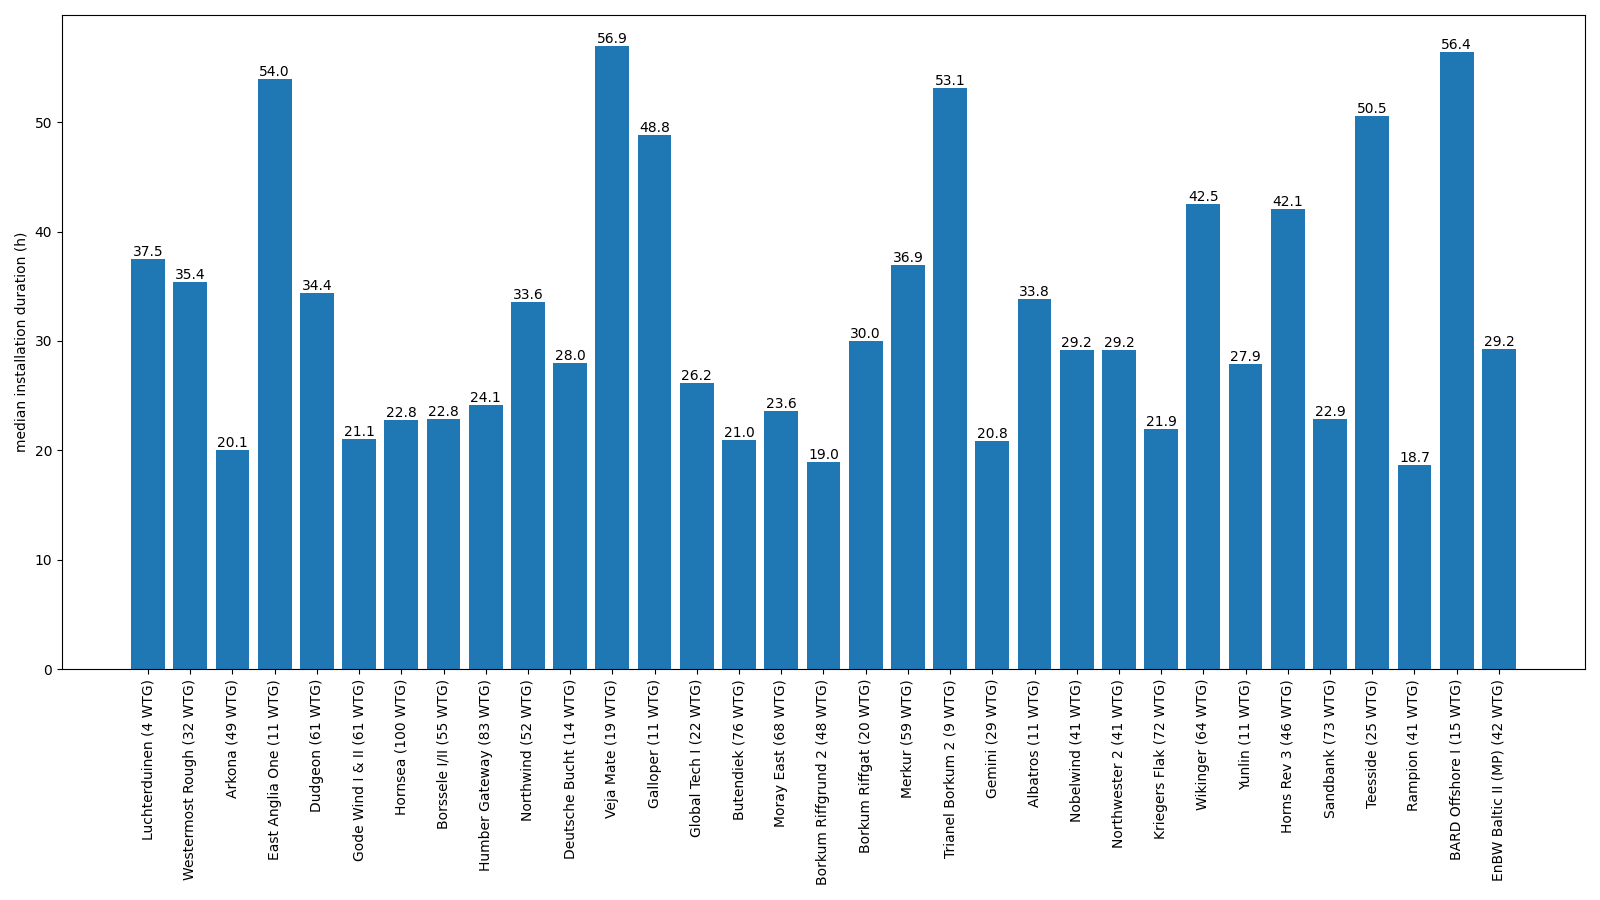

In [276]:
plt.figure(figsize=(16,9))
p1 = plt.bar(
    [x for x in range(len(installations))], 
    [x.duration.median() for _, x in installations.items()],
)
plt.xticks(
    [x for x in range(len(installations))],
    [ f"{windfarm_database.loc[x]['name']} ({len(y)} WTG)" for x, y in installations.items()],
    rotation=90
)
ax = plt.gca()
ax.bar_label(p1, [f"{x.duration.median():1.1f}" for _, x in installations.items()], label_type='edge')
plt.ylabel("median installation duration (h)")
plt.tight_layout()

<IPython.core.display.Javascript object>


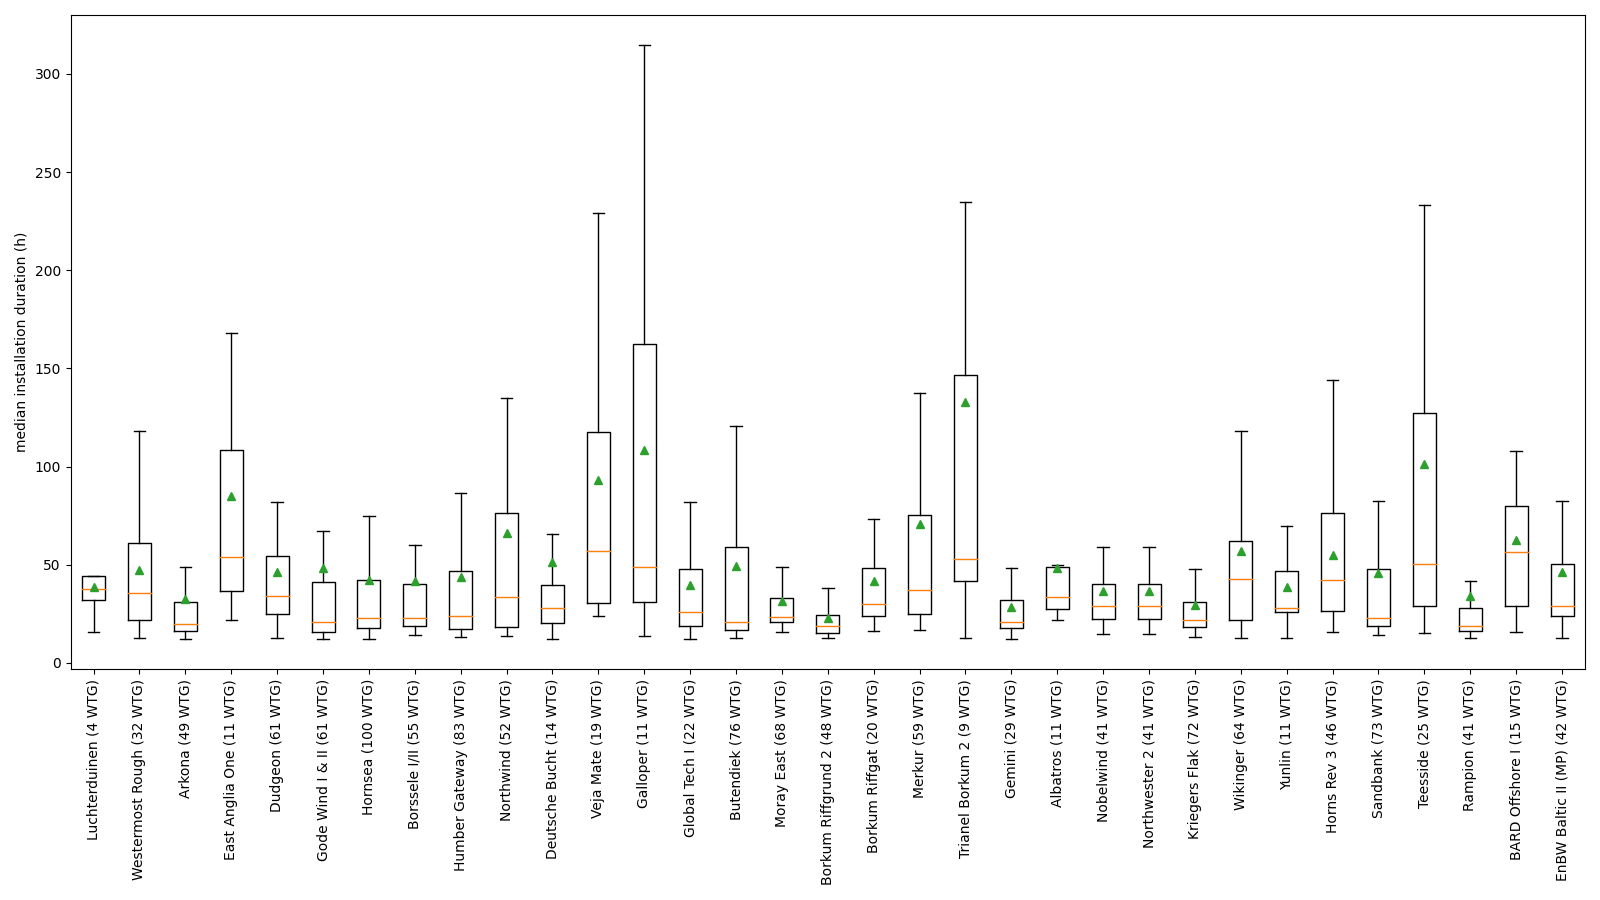

In [278]:
plt.figure(figsize=(16,9))
#p1 = plt.boxplot(
#    [x for x in range(len(installations))], 
#    [x.duration.median() for _, x in installations.items()],
#)
plt.boxplot([x.duration for x in installations.values()], showmeans=True, showfliers=False)
plt.xticks(
    [x + 1 for x in range(len(installations))],
    [ f"{windfarm_database.loc[i]['name']} ({len(y)} WTG)" for i, y in installations.items()],
    rotation=90
)
ax = plt.gca()
#ax.bar_label(p1, [ f"{windfarm_database.loc[i].turbine_power:1.1f}" for i, x in installations.items()], label_type='edge')
plt.ylabel("median installation duration (h)")
plt.tight_layout()

<IPython.core.display.Javascript object>


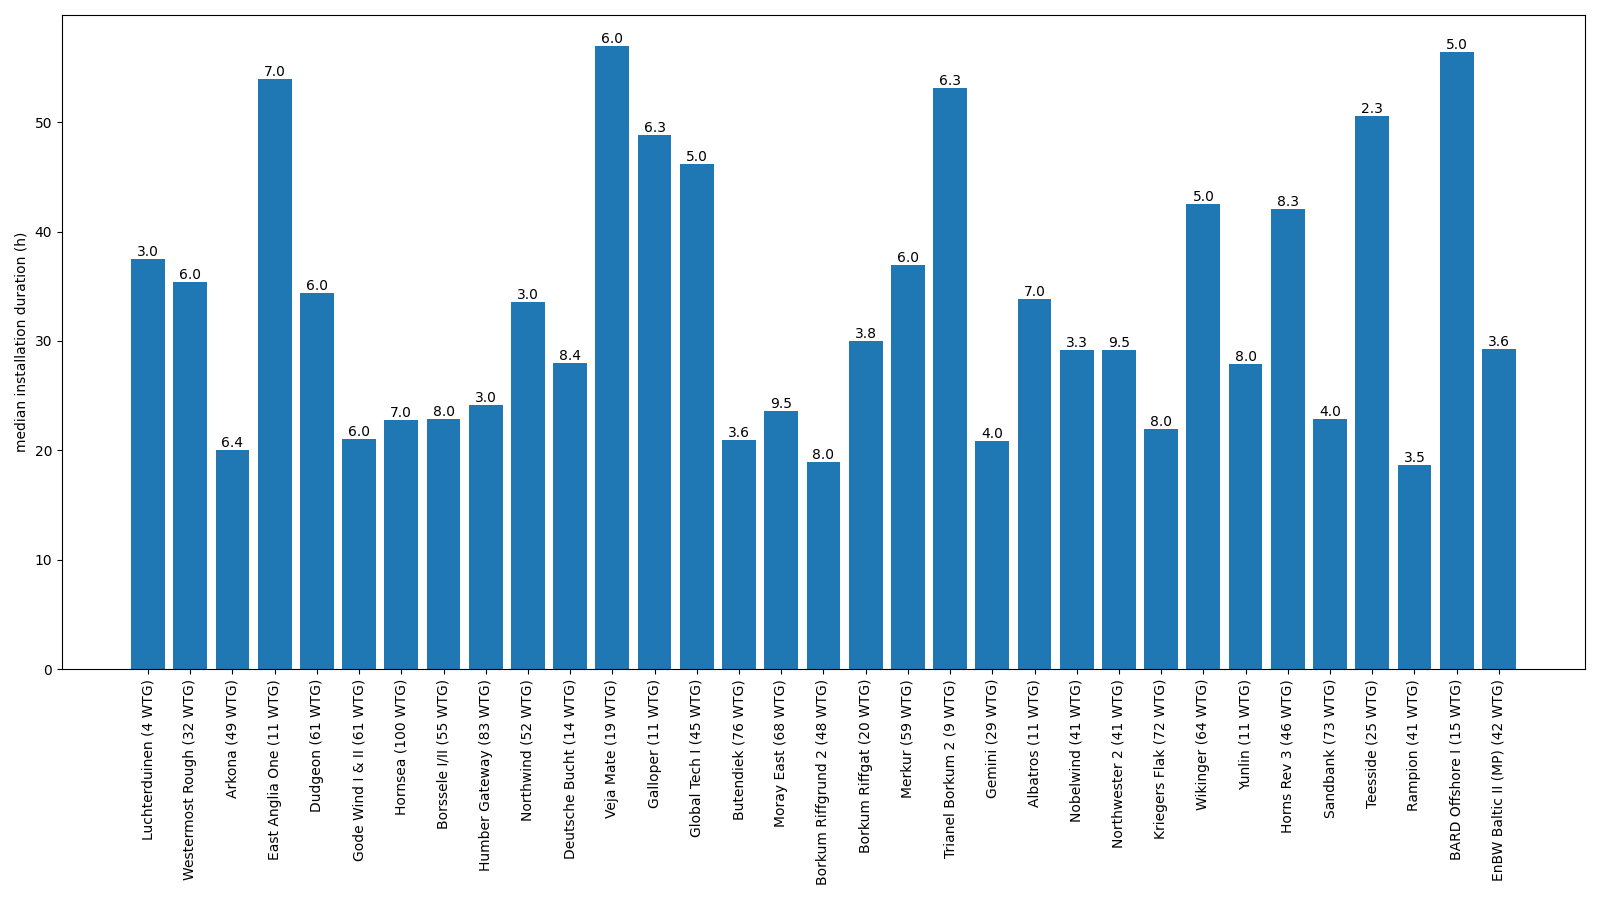

In [250]:
plt.figure(figsize=(16,9))
p1 = plt.bar(
    [x for x in range(len(installations))], 
    [x.duration.median() for _, x in installations.items()],
)
plt.xticks(
    [x for x in range(len(installations))],
    [ f"{windfarm_database.loc[i]['name']} ({len(y)} WTG)" for i, y in installations.items()],
    rotation=90
)
ax = plt.gca()
ax.bar_label(p1, [ f"{windfarm_database.loc[i].turbine_power:1.1f}" for i, x in installations.items()], label_type='edge')
plt.ylabel("median installation duration (h)")
plt.tight_layout()

<IPython.core.display.Javascript object>


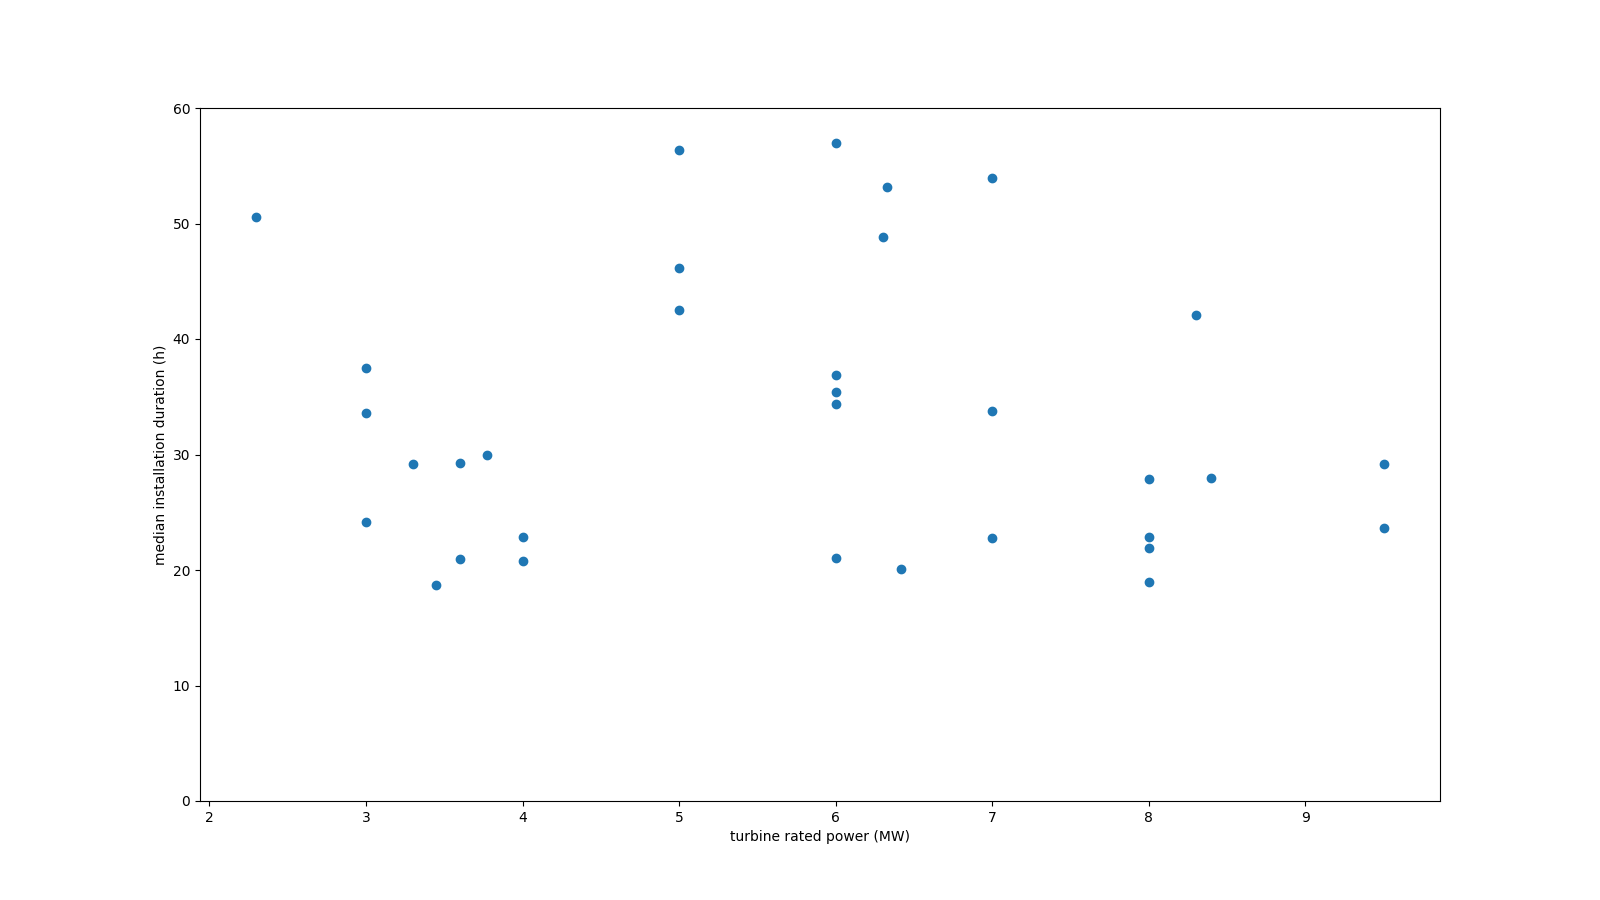

(0.0, 60.0)

In [261]:
plt.figure(figsize=(16,9))
for i, installation in installations.items():
    power = windfarm_database.loc[i].turbine_power
    plt.scatter(power, installation.duration.median(), color='tab:blue')
plt.xlabel("turbine rated power (MW)")
plt.ylabel("median installation duration (h)")
plt.ylim([0, 60])

In [282]:
sorted(all_installations.windfarm.unique())

['albatros',
 'arkona',
 'bard-oﬀshore-i',
 'borkum-riffgrund-2',
 'borkum-riﬀgat',
 'borssele-i-ii',
 'butendiek',
 'deutsche-bucht',
 'dudgeon',
 'east-anglia-one',
 'enbw-baltic-ii-(mp)',
 'galloper',
 'gemini',
 'global-tech-i',
 'gode-wind-i-&-ii',
 'horns-rev-3',
 'hornsea',
 'humber-gateway',
 'kriegers-flak',
 'luchterduinen',
 'merkur',
 'moray-east',
 'nobelwind',
 'northwester-2',
 'northwind',
 'rampion',
 'sandbank',
 'teesside',
 'trianel-borkum-2',
 'veja-mate',
 'westermost-rough',
 'wikinger',
 'yunlin']

<IPython.core.display.Javascript object>


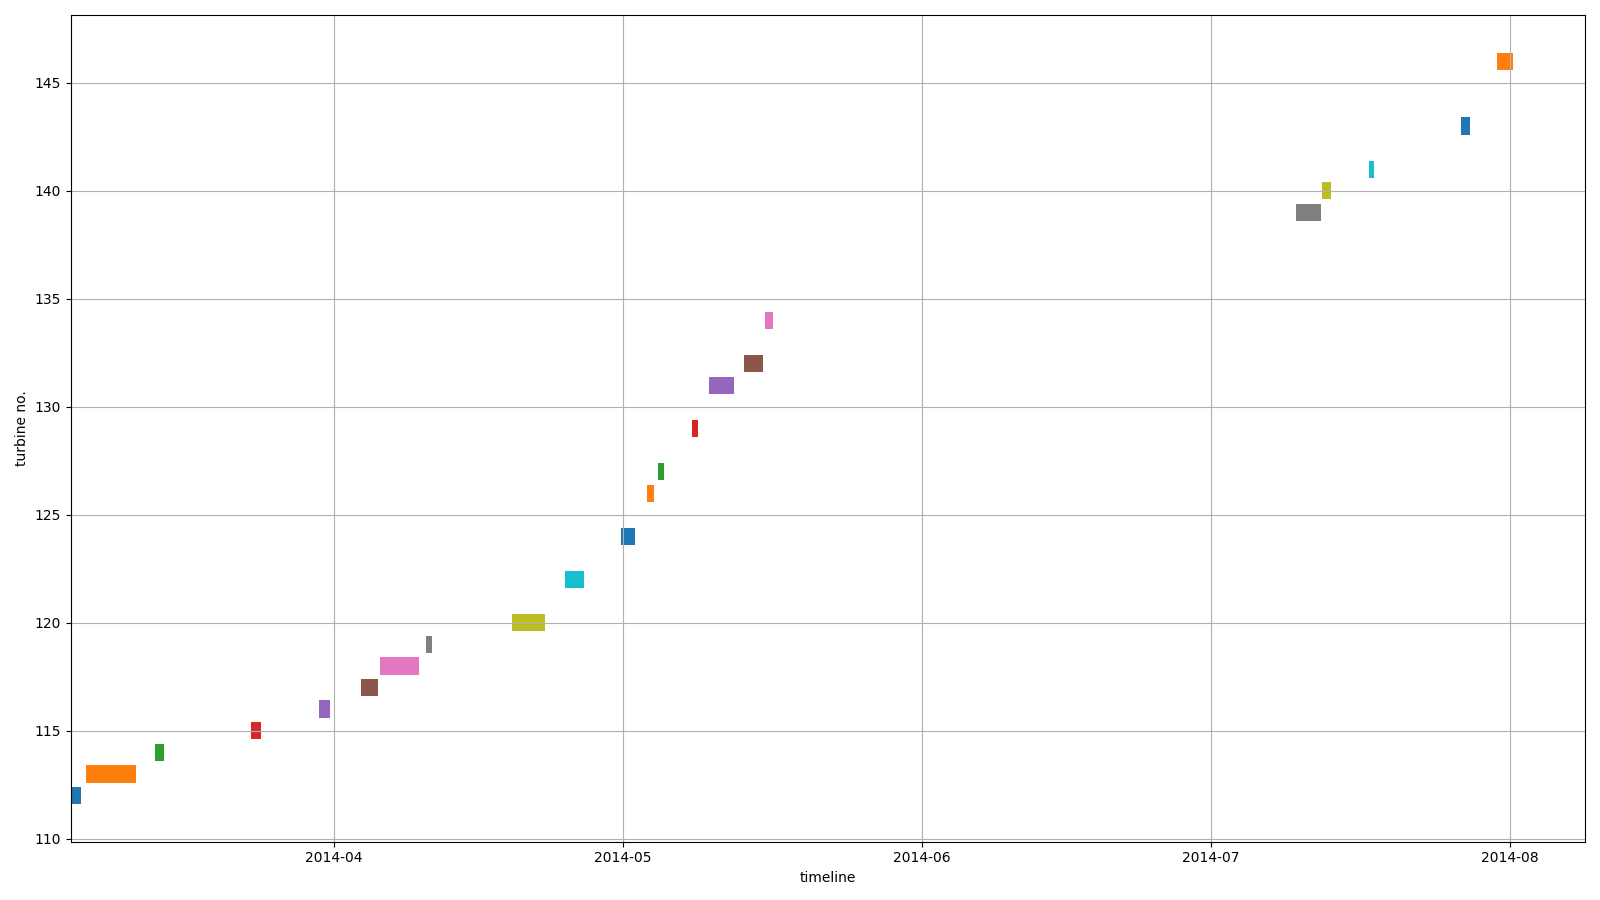

In [279]:
plot_gantt(all_installations[all_installations.windfarm == "global-tech-i"])

<IPython.core.display.Javascript object>


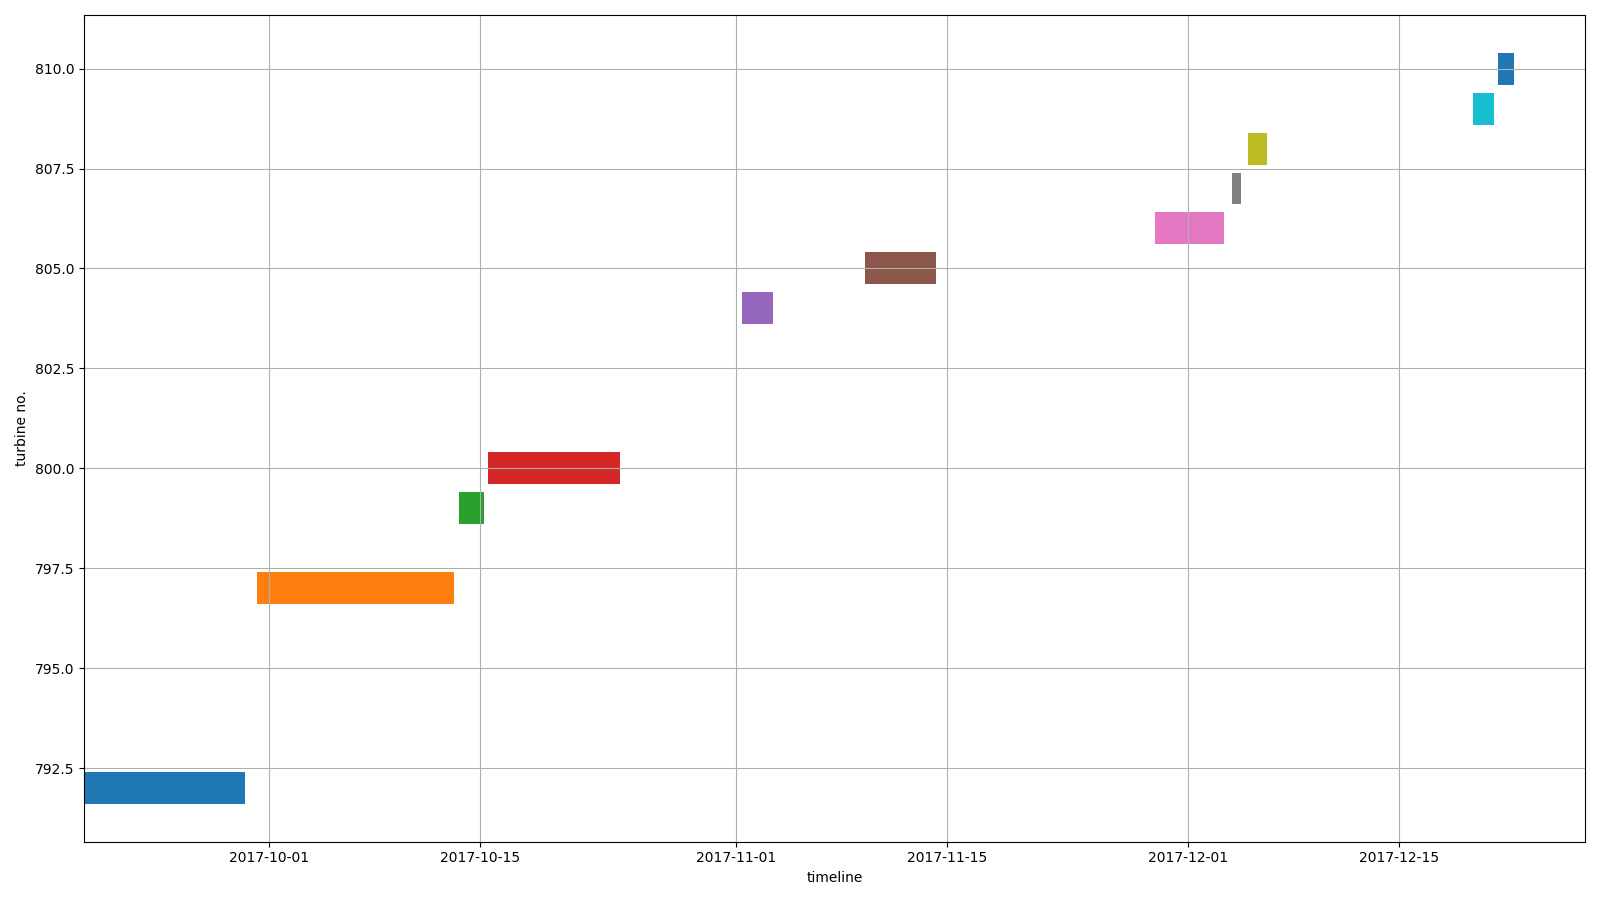

In [280]:
plot_gantt(all_installations[all_installations.windfarm == "galloper"])

<IPython.core.display.Javascript object>


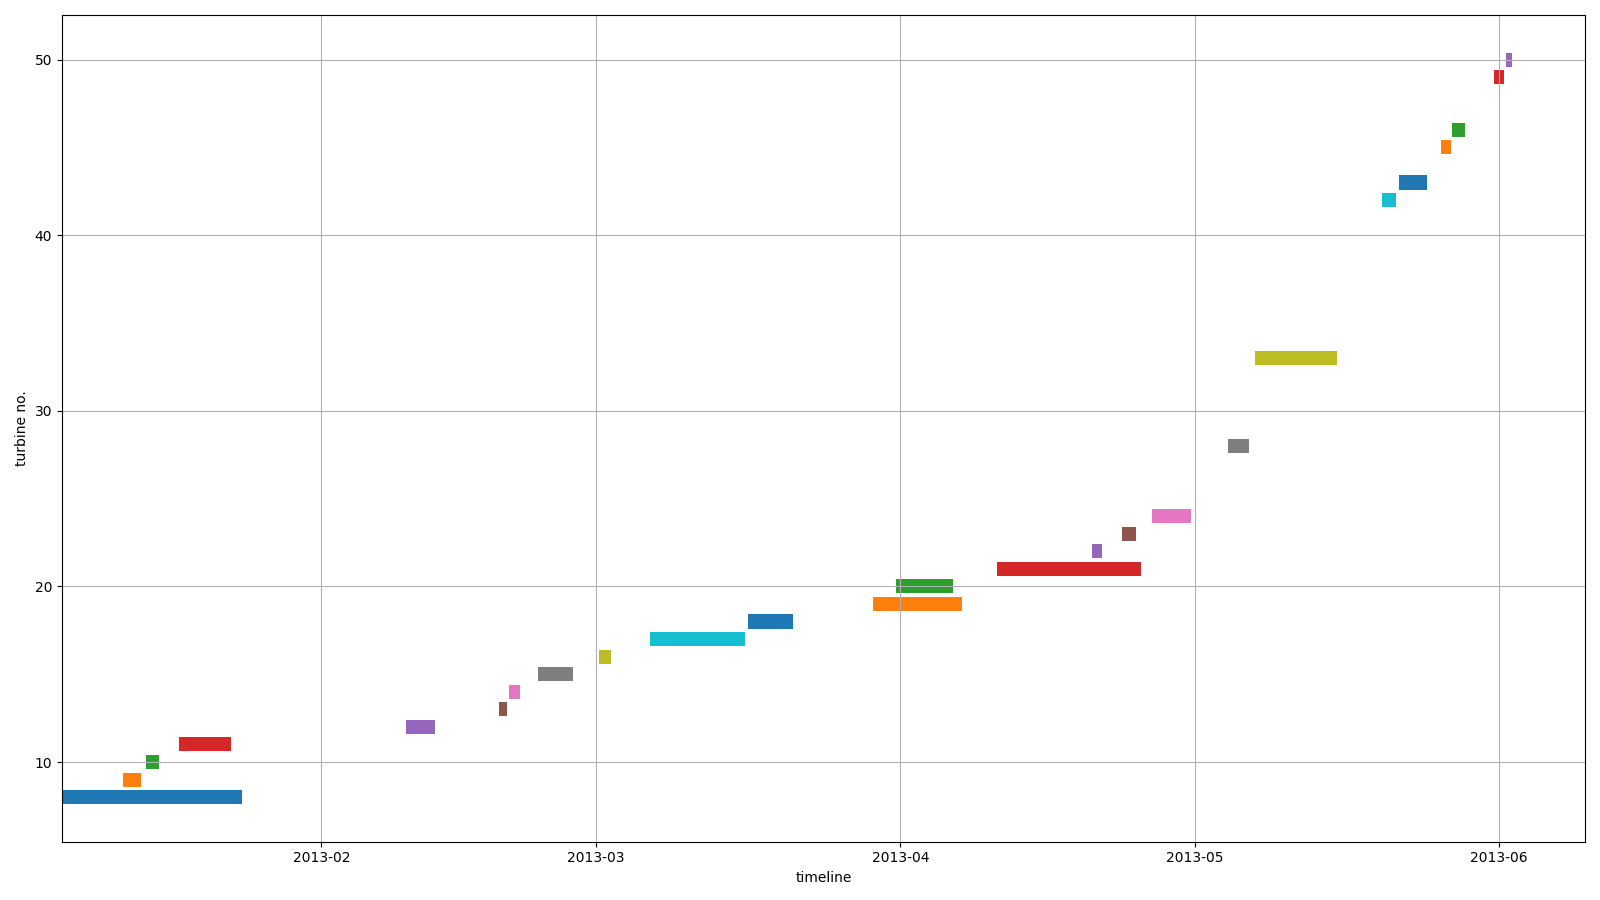

In [281]:
plot_gantt(all_installations[all_installations.windfarm == "teesside"])

<IPython.core.display.Javascript object>


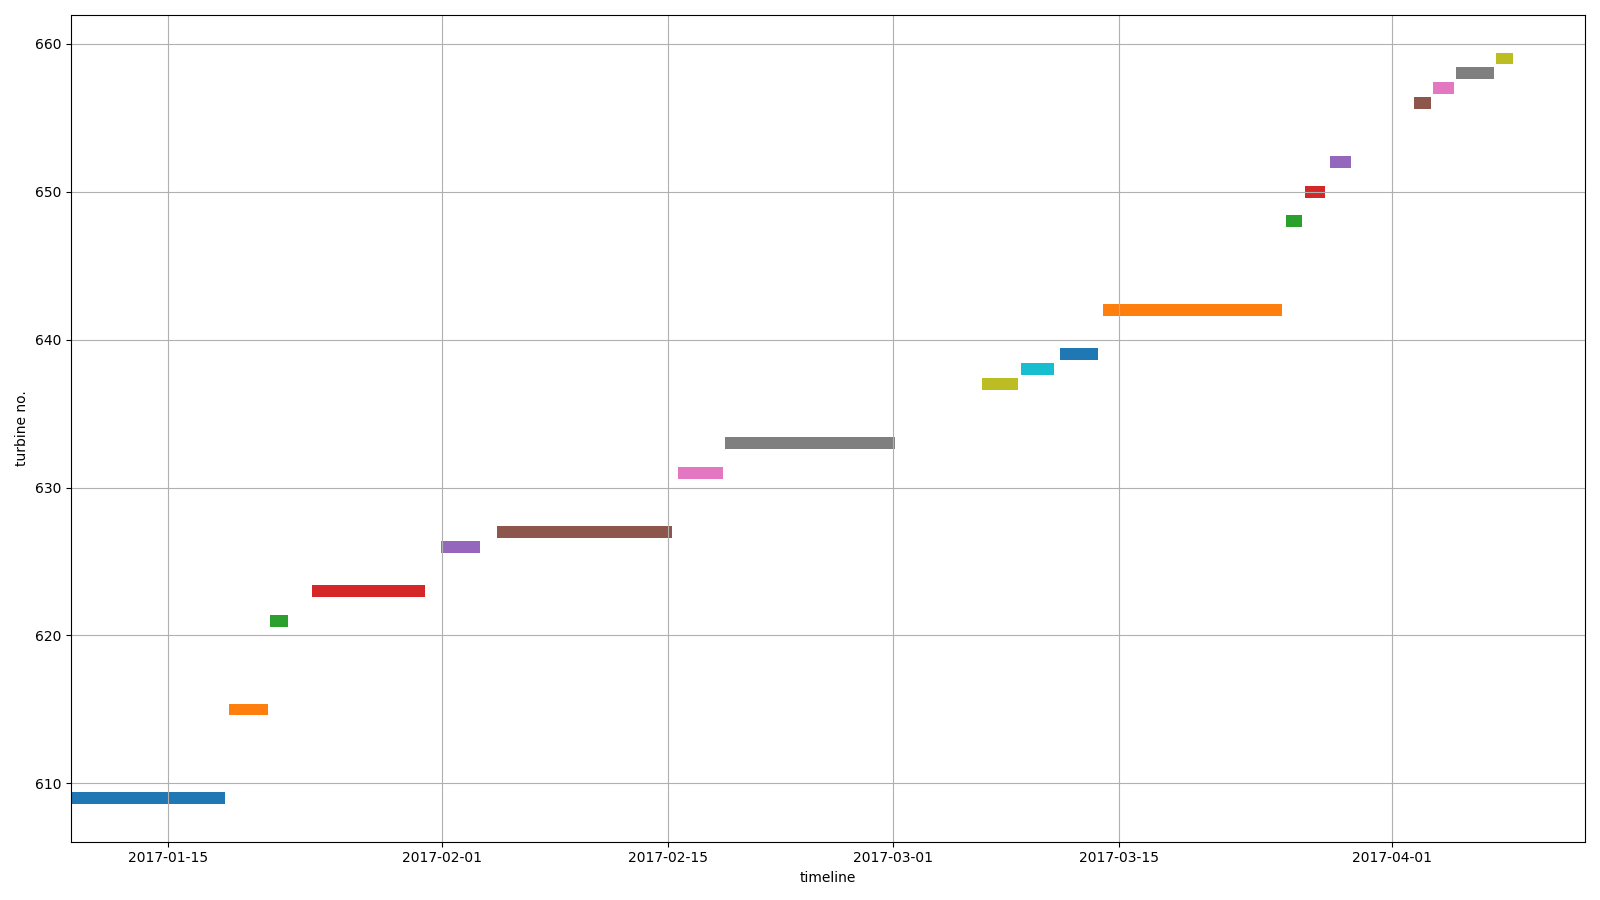

In [283]:
plot_gantt(all_installations[all_installations.windfarm == "veja-mate"])

<IPython.core.display.Javascript object>


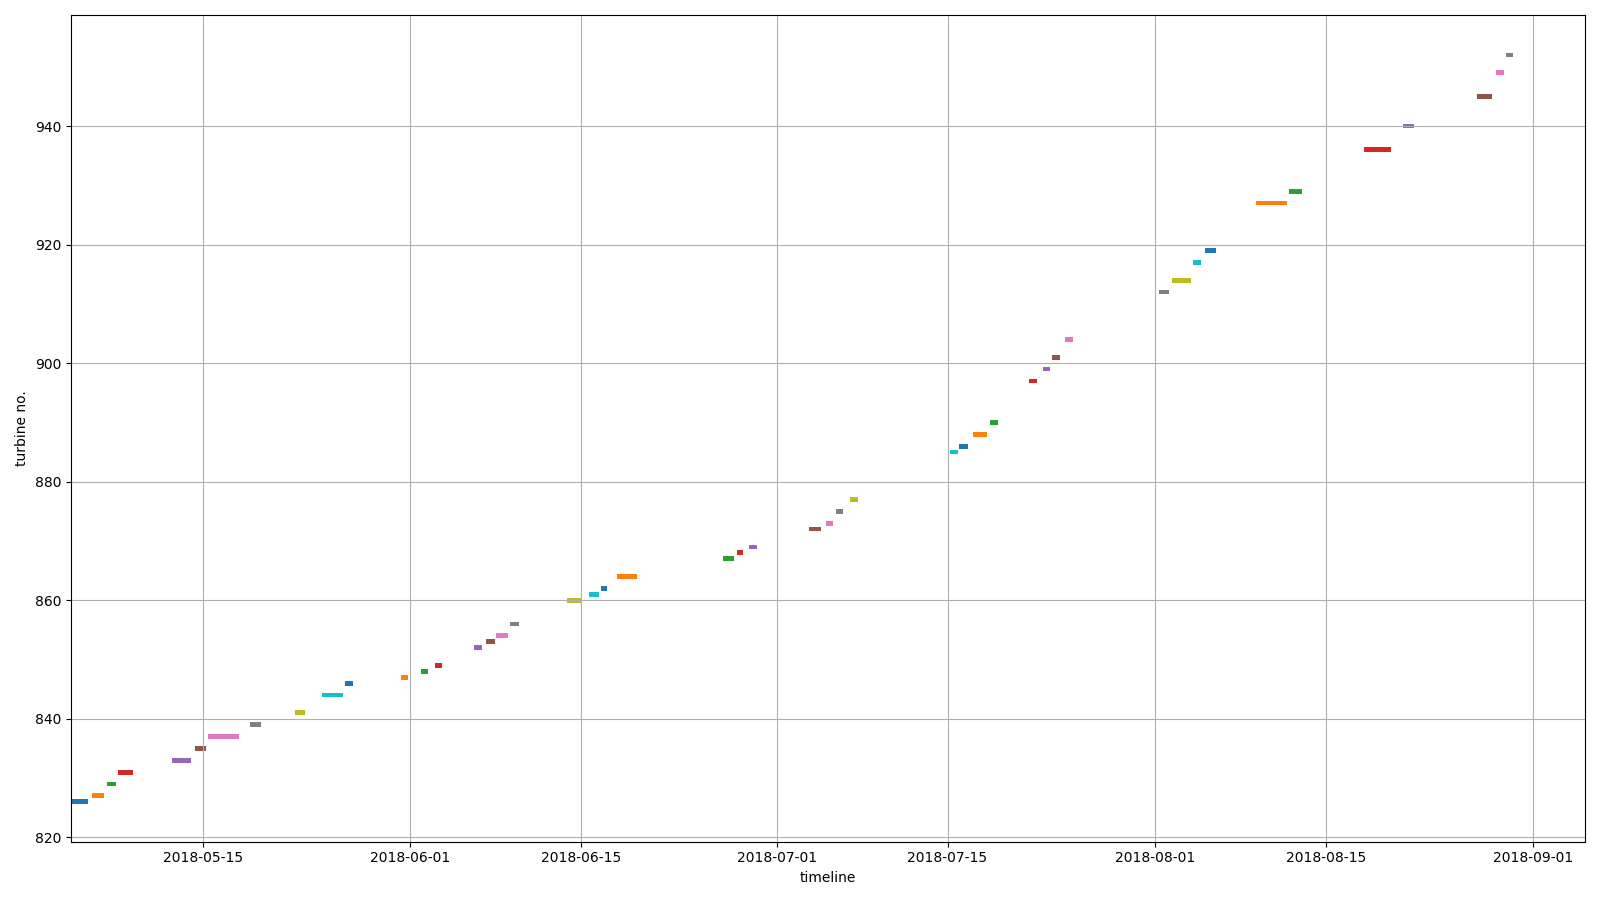

In [284]:
plot_gantt(all_installations[all_installations.windfarm == "borkum-riffgrund-2"])